blister1---[[6, 5, 257, 391], [774, 398, 1025, 784], [1029, 398, 1280, 784], [262, 5, 513, 391], [511, 1, 762, 387], [1024, 0, 1275, 386], [511, 395, 762, 781], [768, 2, 1019, 388], [254, 395, 505, 781], [6, 400, 257, 786]]


In [15]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow


blister2----[[774, 398, 1025, 784], [518, 399, 769, 785], [774, 7, 1025, 393], [1029, 6, 1280, 392], [517, 6, 768, 392], [5, 6, 256, 392], [263, 399, 514, 785], [6, 399, 257, 785], [256, 0, 507, 386], [1029, 400, 1280, 786]]

blister----{blister1:{1:[6, 5, 257, 391],2:[774, 398, 1025, 784],3:[1029, 398, 1280, 784],4:[262, 5, 513, 391],5:[511, 1, 762, 387],6:[1024, 0, 1275, 386],7:[511, 395, 762, 781],8:[768, 2, 1019, 388],9: [254, 395, 505, 781],10:[6, 400, 257, 786]}},{blister2:{1:[774, 398, 1025, 784],2:[518, 399, 769, 785],3:[774, 7, 1025, 393],4:[1029, 6, 1280, 392],5:[517, 6, 768, 392],6: [5, 6, 256, 392],7:[263, 399, 514, 785],8:[6, 399, 257, 785],9:[256, 0, 507, 386],10:[1029, 400, 1280, 786]}}


In [89]:
blister={'blister1':{1:[6, 5, 257, 391],2:[774, 398, 1025, 784],3:[1029, 398, 1280, 784],4:[262, 5, 513, 391],5:[511, 1, 762, 387],6:[1024, 0, 1275, 386],7:[511, 395, 762, 781],8:[768, 2, 1019, 388],9: [254, 395, 505, 781],10:[6, 400, 257, 786]},'blister2':{1:[774, 398, 1025, 784],2:[518, 399, 769, 785],3:[774, 7, 1025, 393],4:[1029, 6, 1280, 392],5:[517, 6, 768, 392],6: [5, 6, 256, 392],7:[263, 399, 514, 785],8:[6, 399, 257, 785],9:[256, 0, 507, 386],10:[1029, 400, 1280, 786]}}

In [90]:
height =251
width =386

def rotate_tablets(image,blister,key,key1):
    img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    black_img = np.zeros((image.shape[0],image.shape[1],3), np.uint8)
    cnts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]  

    # print(len(cnts))

    c = max(cnts, key=cv2.contourArea)


    ellipse = cv2.fitEllipse(c)

    image = cv2.ellipse(image,ellipse,(0,255,0),2)

    (h, w) =image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D((cX, cY),ellipse[2], 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))

    rotate_gray=cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)

    cnts = cv2.findContours(rotate_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]  

    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    crop_img=rotated[extTop[1]:extBot[1],extLeft[0]:extRight[0]]

    centre_crop=(crop_img.shape[1]//2,crop_img.shape[0]//2)

    centre_black=(black_img.shape[1]// 2,black_img.shape[0]// 2)

    i=int(centre_black[0]-centre_crop[0])
    j=int(centre_black[1]-centre_crop[1])

    black_img[j:j+crop_img.shape[0],i:i+crop_img.shape[1]]=crop_img

    blister[key][int(key1)]=blister[key][int(key1)]+[int(i),int(j),int(i+crop_img.shape[1]),int(j+crop_img.shape[0])]

    # print(blister)

    # blister=[j:j+crop_img.shape[0],i:i+crop_img.shape[1]]

    return black_img

In [91]:
# count=0
# batch_size=10
# # blister_size=10
# image=[]
# batch=[]


# for img in os.listdir(img_dir):

#     cropped_img=cv2.imread(img_dir+'/'+img)

#     segmented_tablet,mask= segmentator.segment(model=tablets_segmentation, img=cropped_img, threshold_value=float(0.5))



#     if len(np.where(mask==255)[0])>30:
        
#         start=time.time()

#         segmented_tablet=rotate_tablets(segmented_tablet)

#         count+=1

#         batch.append(segmented_tablet)

#         image.append(cropped_img)

#         end=time.time()

#         print(img)   

#         if count==batch_size:

#             concated_image1=cv2.hconcat(batch[:5])
#             concated_image2=cv2.hconcat(batch[5:])

#             concated_image3=cv2.hconcat(image[:5])
#             concated_image4=cv2.hconcat(image[5:])


#             final_concat=cv2.vconcat([concated_image1,concated_image2])

#             final_img_concat=cv2.vconcat([concated_image3,concated_image4])
            
#             cv2.imwrite('/home/frinks3/RISHABH/ACG/temp_img_concat'+'/'+img.split('.')[0]+'.png',final_concat)

#             cv2.imwrite('/home/frinks3/RISHABH/ACG/temp'+'/'+img.split('.')[0]+'.png',final_img_concat)


#             count=0

#             batch=[]

#             image=[]

#         else:
#             pass

In [92]:
dir='/content/'

In [93]:
# img=cv2.imread('/content/blister2_segment.png')

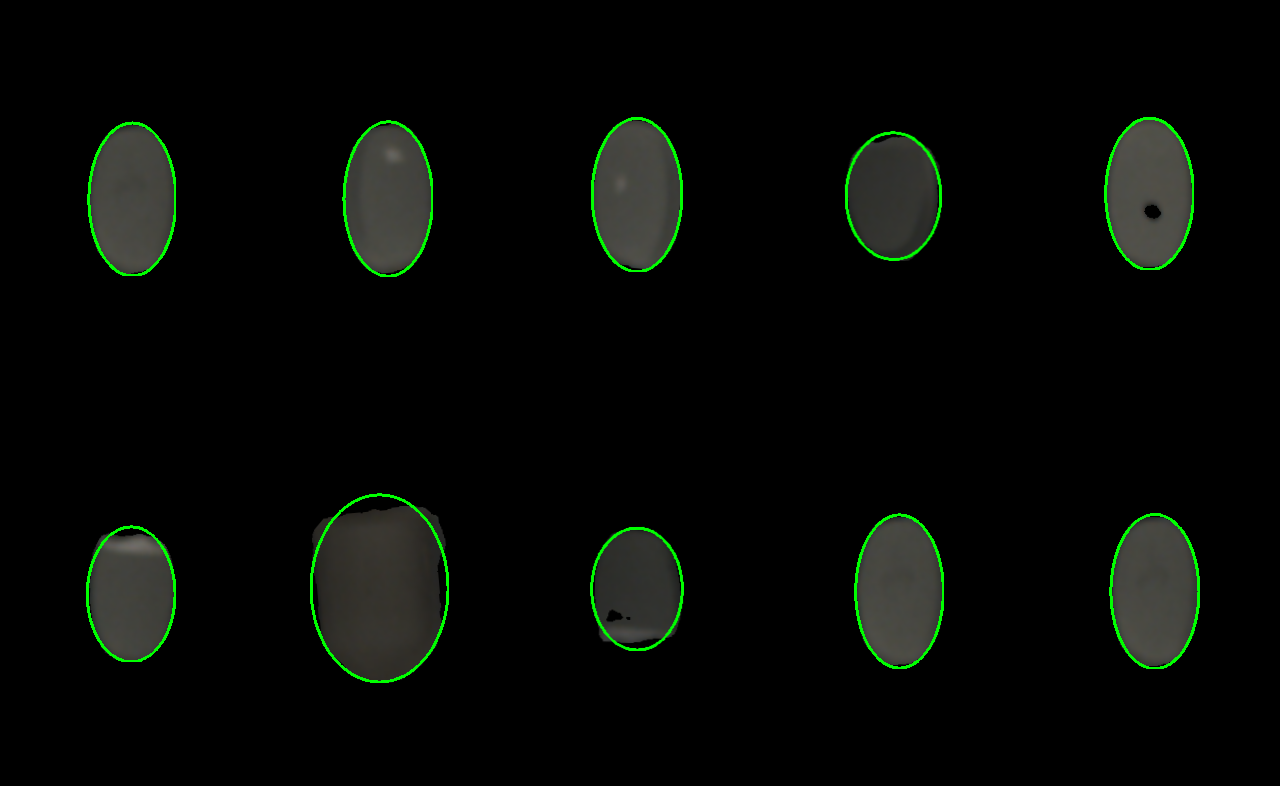

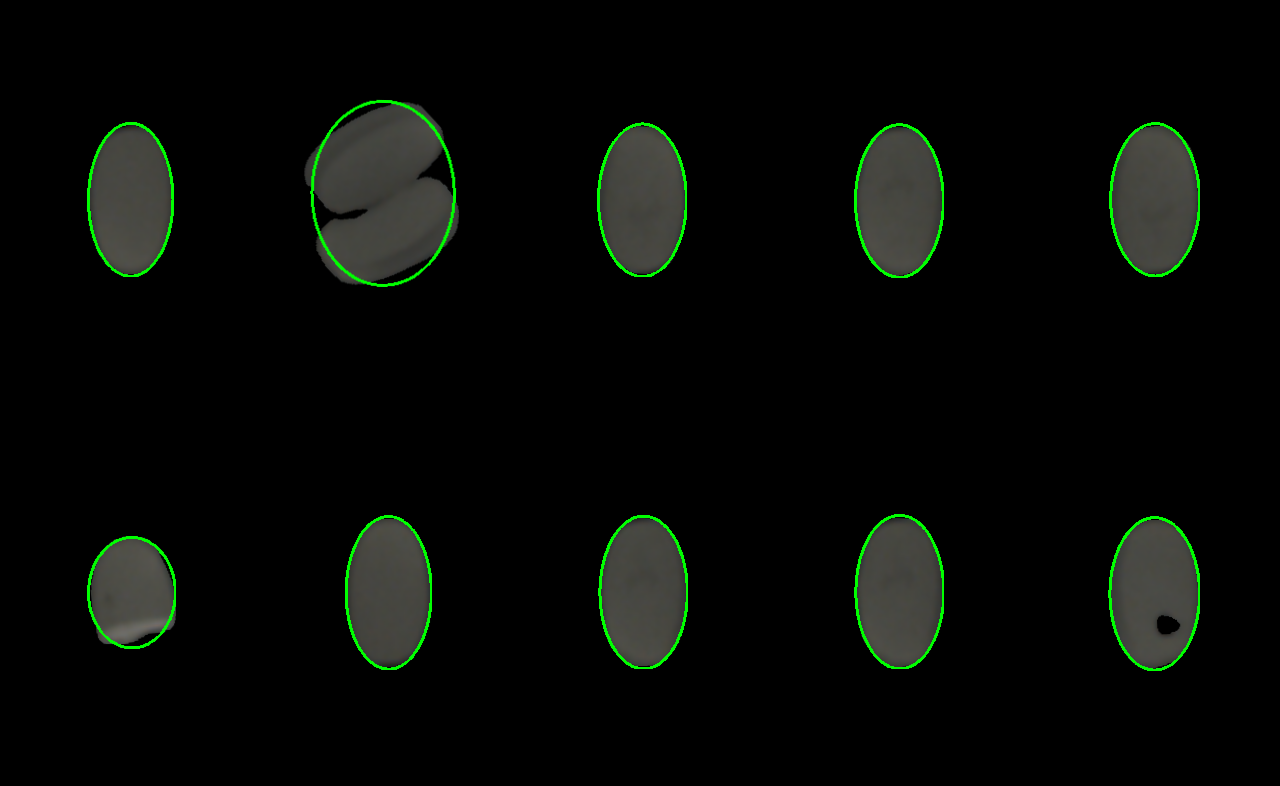

{'blister1': {1: [6, 5, 257, 391, 81, 116, 170, 271], 2: [774, 398, 1025, 784, 80, 115, 170, 271], 3: [1029, 398, 1280, 784, 80, 115, 171, 271], 4: [262, 5, 513, 391, 80, 115, 171, 272], 5: [511, 1, 762, 387, 79, 115, 172, 271], 6: [1024, 0, 1275, 386, 80, 117, 170, 270], 7: [511, 395, 762, 781, 78, 131, 173, 256], 8: [768, 2, 1019, 388, 76, 128, 174, 259], 9: [254, 395, 505, 781, 56, 98, 195, 288], 10: [6, 400, 257, 786, 80, 125, 170, 262]}, 'blister2': {1: [774, 398, 1025, 784, 80, 116, 170, 271], 2: [518, 399, 769, 785, 80, 116, 170, 270], 3: [774, 7, 1025, 393, 80, 116, 170, 271], 4: [1029, 6, 1280, 392, 80, 116, 171, 271], 5: [517, 6, 768, 392, 80, 116, 170, 271], 6: [5, 6, 256, 392, 81, 116, 169, 271], 7: [263, 399, 514, 785, 82, 116, 169, 271], 8: [6, 399, 257, 785, 80, 137, 170, 250], 9: [256, 0, 507, 386, 48, 99, 203, 287], 10: [1029, 400, 1280, 786, 79, 116, 171, 271]}}


In [94]:
##########################yolo##################################
##########################segmentation#########################

############################anomaly#########################

for key,value in blister.items():
  # if key=='blister2':
    img=cv2.imread(dir+key+'_segment'+'.png')
    for key1,value1 in value.items():
      # print(key1)
      # print(value1)
      cropped_img=img[value1[1]:value1[3],value1[0]:value1[2]]
      rotated_img=rotate_tablets(cropped_img,blister,key,key1)
      img[value1[1]:value1[3],value1[0]:value1[2]]=rotated_img

    cv2_imshow(img)
print(blister)
      # cv2_imshow(cropped_img)


In [95]:
blister

{'blister1': {1: [6, 5, 257, 391, 81, 116, 170, 271],
  2: [774, 398, 1025, 784, 80, 115, 170, 271],
  3: [1029, 398, 1280, 784, 80, 115, 171, 271],
  4: [262, 5, 513, 391, 80, 115, 171, 272],
  5: [511, 1, 762, 387, 79, 115, 172, 271],
  6: [1024, 0, 1275, 386, 80, 117, 170, 270],
  7: [511, 395, 762, 781, 78, 131, 173, 256],
  8: [768, 2, 1019, 388, 76, 128, 174, 259],
  9: [254, 395, 505, 781, 56, 98, 195, 288],
  10: [6, 400, 257, 786, 80, 125, 170, 262]},
 'blister2': {1: [774, 398, 1025, 784, 80, 116, 170, 271],
  2: [518, 399, 769, 785, 80, 116, 170, 270],
  3: [774, 7, 1025, 393, 80, 116, 170, 271],
  4: [1029, 6, 1280, 392, 80, 116, 171, 271],
  5: [517, 6, 768, 392, 80, 116, 170, 271],
  6: [5, 6, 256, 392, 81, 116, 169, 271],
  7: [263, 399, 514, 785, 82, 116, 169, 271],
  8: [6, 399, 257, 785, 80, 137, 170, 250],
  9: [256, 0, 507, 386, 48, 99, 203, 287],
  10: [1029, 400, 1280, 786, 79, 116, 171, 271]}}

In [96]:
blister

{'blister1': {1: [6, 5, 257, 391, 81, 116, 170, 271],
  2: [774, 398, 1025, 784, 80, 115, 170, 271],
  3: [1029, 398, 1280, 784, 80, 115, 171, 271],
  4: [262, 5, 513, 391, 80, 115, 171, 272],
  5: [511, 1, 762, 387, 79, 115, 172, 271],
  6: [1024, 0, 1275, 386, 80, 117, 170, 270],
  7: [511, 395, 762, 781, 78, 131, 173, 256],
  8: [768, 2, 1019, 388, 76, 128, 174, 259],
  9: [254, 395, 505, 781, 56, 98, 195, 288],
  10: [6, 400, 257, 786, 80, 125, 170, 262]},
 'blister2': {1: [774, 398, 1025, 784, 80, 116, 170, 271],
  2: [518, 399, 769, 785, 80, 116, 170, 270],
  3: [774, 7, 1025, 393, 80, 116, 170, 271],
  4: [1029, 6, 1280, 392, 80, 116, 171, 271],
  5: [517, 6, 768, 392, 80, 116, 170, 271],
  6: [5, 6, 256, 392, 81, 116, 169, 271],
  7: [263, 399, 514, 785, 82, 116, 169, 271],
  8: [6, 399, 257, 785, 80, 137, 170, 250],
  9: [256, 0, 507, 386, 48, 99, 203, 287],
  10: [1029, 400, 1280, 786, 79, 116, 171, 271]}}

its good
its a good_tablet----blister11
its good
its a good_tablet----blister12
its good
its a good_tablet----blister13
got a defect
defected_id---blister14
got a defect
defected_id---blister15
got a defect
defected_id---blister16
got a defect
defected_id---blister17
got a defect
defected_id---blister18
got a defect
defected_id---blister19
got a defect
defected_id---blister110


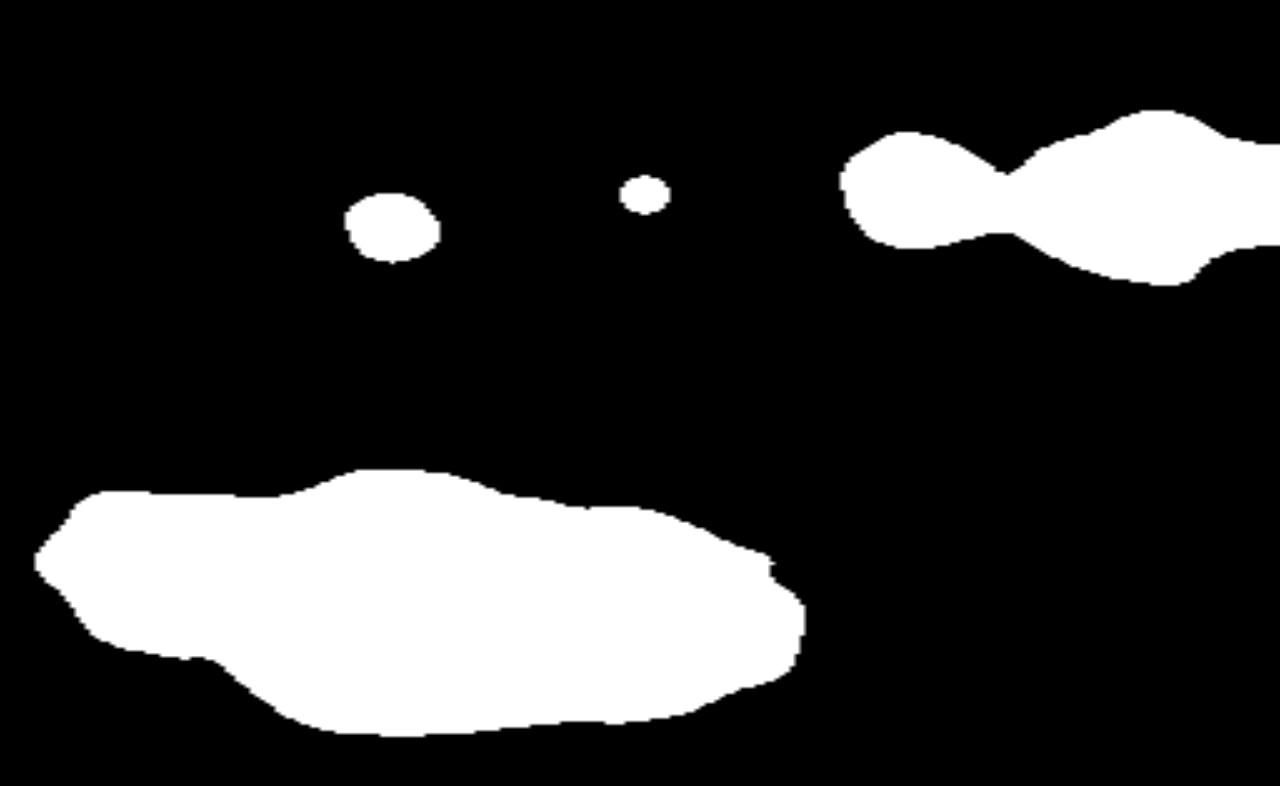

its good
its a good_tablet----blister21
its good
its a good_tablet----blister22
its good
its a good_tablet----blister23
its good
its a good_tablet----blister24
got a defect
defected_id---blister25
its good
its a good_tablet----blister26
its good
its a good_tablet----blister27
got a defect
defected_id---blister28
got a defect
defected_id---blister29
got a defect
defected_id---blister210


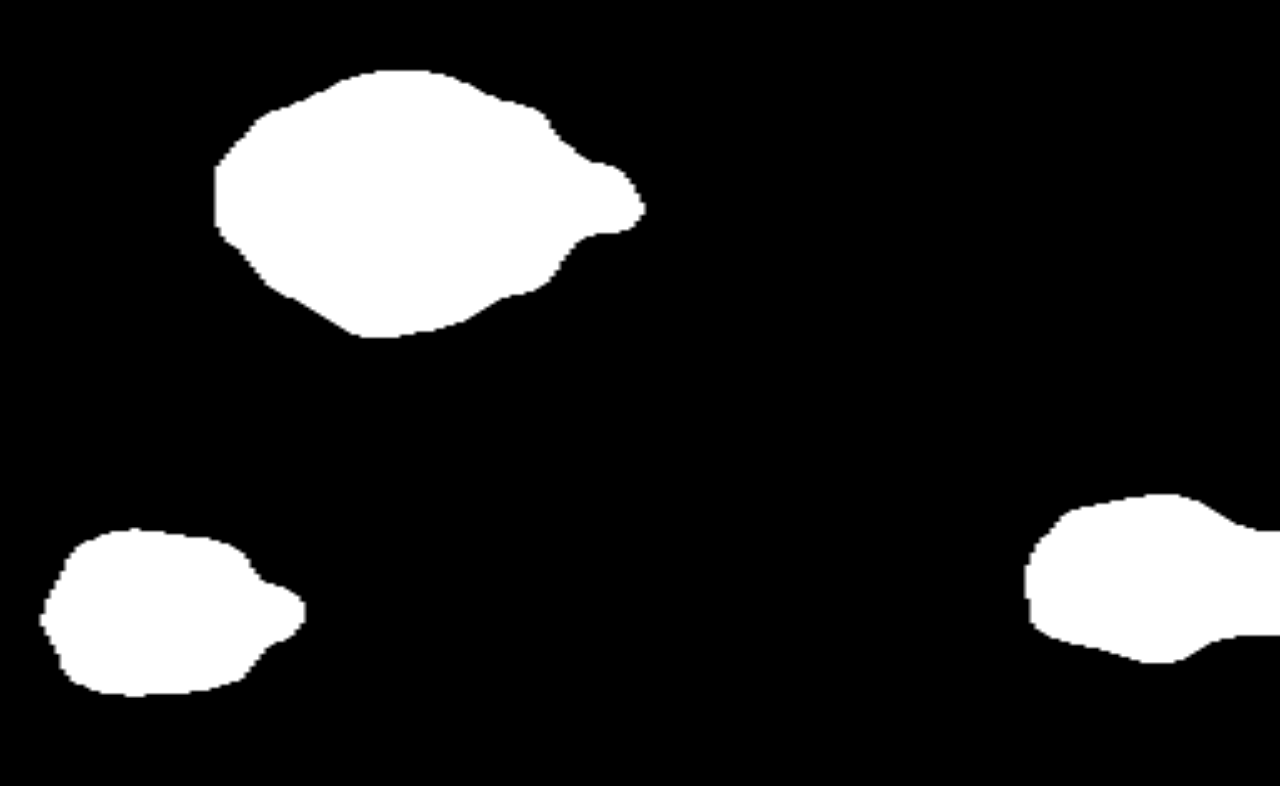

In [97]:
for key,value in blister.items():
  # if key=='blister2':
    img=cv2.imread(dir+key+'_mask'+'.png')
    for key1,value1 in value.items():
      # print(key1)
      # print(value1)
      masked_img=img[value1[1]:value1[3],value1[0]:value1[2]]
      tablet_mask=masked_img[value1[5]:value1[7],value1[4]:value1[6]]
      if len(np.where(tablet_mask==255)[0])>30:
        print('got a defect')
        print(f'defected_id---{key}{key1}') 

      else:
        print('its good')
        print(f'its a good_tablet----{key}{key1}')       


    cv2_imshow(img)

# print(blister)


#########################################classification##################################################